In [1]:
import sys
sys.path.append('./../')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.functions import plot_disparos_neuronios


numprocs=1


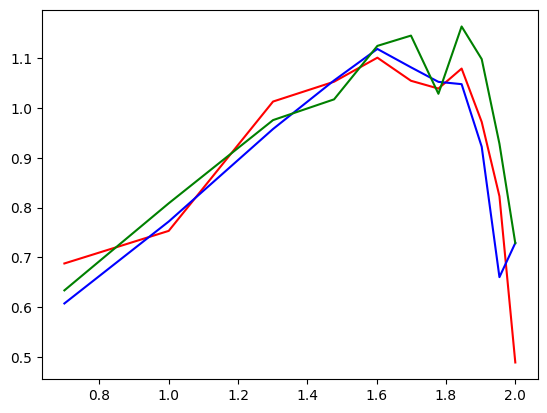

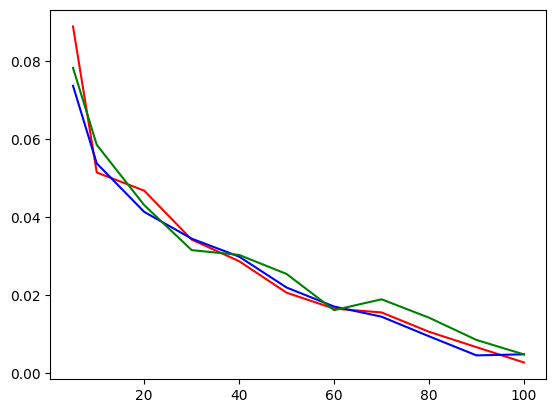

In [2]:
force_levels = np.array([55, 110, 220, 330, 440, 550, 660, 770, 880, 990, 1100])
cv_force = np.zeros(len(force_levels))
cv_force_red = np.zeros(len(force_levels))
cv_force_aug = np.zeros(len(force_levels))
sd_force = np.zeros(len(force_levels))
sd_force_red = np.zeros(len(force_levels))
sd_force_aug = np.zeros(len(force_levels))


i = 0
for force_level in force_levels:
    data = np.loadtxt(f'./força2.Umax=2000/Ca_forca_ref{force_level}_Umax=2000.csv', skiprows=1, delimiter=',')
    time = data[:,0]
    force = data[:,1]
    data_red = np.loadtxt(f'./força2.Umax=1600/Ca_forca_ref{force_level}_Umax=1600.csv', skiprows=1, delimiter=',')
    time_red = data_red[:,0]
    force_red = data_red[:,1]
    data_aug = np.loadtxt(f'./força2.Umax=2400/Ca_forca_ref{force_level}_Umax=2400.csv', skiprows=1, delimiter=',')
    time_aug = data_aug[:,0]
    force_aug = data_aug[:,1]
    sd_force_aug[i] = force_aug[time>5000].std()#/force_aug[time>5000].mean()
    sd_force[i] = force[time>5000].std()#/force[time>5000].mean()
    sd_force_red[i] = force_red[time>5000].std()#/force_red[time>5000].mean()
    cv_force_aug[i] = force_aug[time>5000].std()/force_aug[time>5000].mean()
    cv_force[i] = force[time>5000].std()/force[time>5000].mean()
    cv_force_red[i] = force_red[time>5000].std()/force_red[time>5000].mean()
    i = i + 1
plt.figure()
plt.plot(np.log10(force_levels/11), np.log10(sd_force), 'r')
plt.plot(np.log10(force_levels/11), np.log10(sd_force_aug), 'b')
plt.plot(np.log10(force_levels/11), np.log10(sd_force_red), 'g')
plt.show()
plt.figure()
plt.plot(force_levels/11, cv_force, 'r')
plt.plot(force_levels/11, cv_force_aug, 'b')
plt.plot(force_levels/11, cv_force_red, 'g')
plt.show()

array([[    0.        ,  1622.85      ],
       [    0.        ,  2005.15      ],
       [    0.        ,  2180.75      ],
       ...,
       [   52.        , 24255.50000029],
       [   55.        , 12273.09999989],
       [   58.        , 24359.4000003 ]])

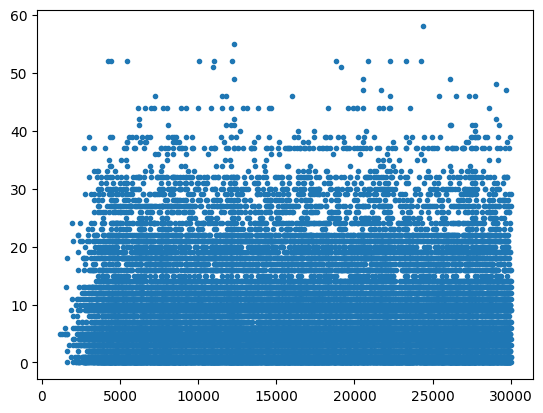

In [3]:
data = pd.read_csv(f'./spikedata2.Umax=2000/Ca_cell_spike_ref_55_Umax=2000.csv', delimiter=',')
data['spike_time'] = data['spike_time'].str.replace(' ms', '')
data['spike_time'] = data['spike_time'].astype('float')
data = data.values
plt.plot(data[:,1], data[:,0], '.')
data

In [4]:
def compute_ar(spike_times):
    fr, t = plot_disparos_neuronios(spike_times, 0, delta_t=0.00005, filtro_ordem=4, freq_corte=0.0005, tempo_max=30)    
    ar = len(fr[(t>5) & (fr>10)])/len(fr[t>5])
    return ar



In [ ]:
rec_perc = np.zeros(len(force_levels))
rec_perc_red = np.zeros(len(force_levels))
rec_perc_aug = np.zeros(len(force_levels))

j = 0
for force_level in force_levels:
    data = pd.read_csv(f'./spikedata2.Umax=2000/Ca_cell_spike_ref_{force_level}_Umax=2000.csv', delimiter=',')
    data['spike_time'] = data['spike_time'].str.replace(' ms', '')
    data['spike_time'] = data['spike_time'].astype('float')
    data = data.values
    ar = np.zeros(100)
    for i in range(100):
        try:
            ar[i] = compute_ar(data[data[:,0]==i,1])
        except:
            ar[i] = 0
    data = pd.read_csv(f'./spikedata2.Umax=2400/Ca_cell_spike_ref_{force_level}_Umax=2400.csv', delimiter=',')
    data['spike_time'] = data['spike_time'].str.replace(' ms', '')
    data['spike_time'] = data['spike_time'].astype('float')
    data = data.values
    ar_aug = np.zeros(100)
    for i in range(100):
        try:
            ar_aug[i] = compute_ar(data[data[:,0]==i,1])
        except:
            ar_aug[i] = 0
    data = pd.read_csv(f'./spikedata2.Umax=1600/Ca_cell_spike_ref_{force_level}_Umax=1600.csv', delimiter=',')
    data['spike_time'] = data['spike_time'].str.replace(' ms', '')
    data['spike_time'] = data['spike_time'].astype('float')
    data = data.values
    ar_red = np.zeros(100)
    for i in range(100):
        try:
            ar_red[i] = compute_ar(data[data[:,0]==i,1])
        except:
            ar_red[i] = 0
    rec_perc[j] = (ar>0.1).sum()
    rec_perc_aug[j] = (ar_aug>0.1).sum()
    rec_perc_red[j] = (ar_red>0.1).sum()
    j = j + 1



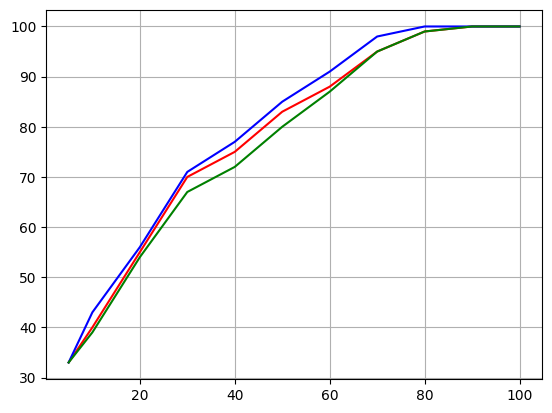

In [8]:
plt.plot(force_levels/1100*100, rec_perc, 'r')
plt.plot(force_levels/1100*100, rec_perc_aug, 'b')
plt.plot(force_levels/1100*100, rec_perc_red, 'g')
plt.grid()